In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data.csv")

In [3]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [4]:
x = df.iloc[:, :-1].values
x

array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       ...,
       [  31.32,   74.33, 1012.92,   36.48],
       [  24.48,   69.45, 1013.86,   62.39],
       [  21.6 ,   62.52, 1017.23,   67.87]])

In [5]:
y = df.iloc[:, -1].values
y

array([463.26, 444.37, 488.56, ..., 429.57, 435.74, 453.28])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [8]:
x_train

array([[   6.22,   39.85, 1012.05,   86.88],
       [  20.37,   60.08, 1017.44,   76.33],
       [  22.74,   58.12, 1015.16,   79.58],
       ...,
       [  22.07,   48.41, 1008.71,   81.29],
       [  20.24,   58.41, 1013.73,   99.59],
       [  20.94,   44.89, 1009.64,   75.14]])

In [9]:
scores = {}

In [10]:
y_train

array([443.73, 454.47, 447.86, ..., 444.01, 449.49, 450.71])

## Decision Tree Regression

In [11]:
from sklearn.tree import DecisionTreeRegressor

In [12]:
decision_tree = DecisionTreeRegressor()

In [13]:
decision_tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [14]:
y_pred = decision_tree.predict(x_test)

In [15]:
from sklearn.metrics import r2_score

In [16]:
scores.update({"decision tree": r2_score(y_true=y_test, y_pred=y_pred)})

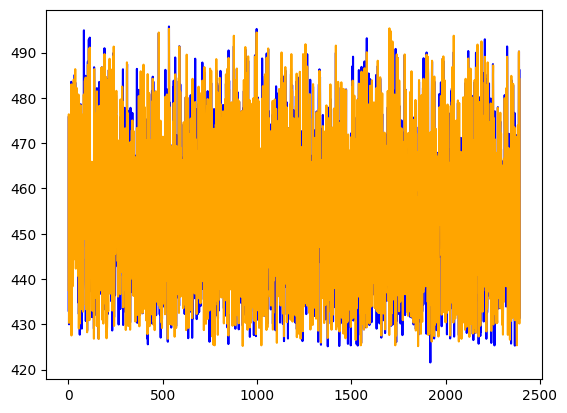

In [17]:
plt.plot(range(1, len(y_test) + 1), y_test, color="blue")
plt.plot(range(1,len(y_test) + 1), y_pred, color="orange")

## Random Forest Regression

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
random_forest = RandomForestRegressor(n_estimators=100)

In [20]:
random_forest.fit(x_train, y_train)

RandomForestRegressor()

In [21]:
y_pred_2 = random_forest.predict(x_test)

In [22]:
scores.update({"random forest": r2_score(y_true=y_test, y_pred=y_pred_2)})

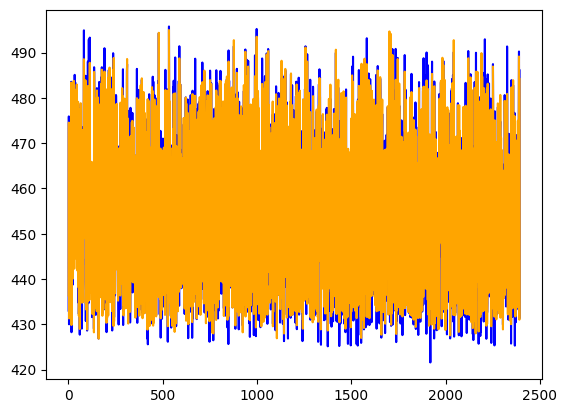

In [23]:
plt.plot(range(1, len(y_test) + 1), y_test, color="blue")
plt.plot(range(1,len(y_test) + 1), y_pred_2, color="orange")

## Support Vector Regression

In [24]:
from sklearn.svm import SVR

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scale_x = StandardScaler()
scale_y = StandardScaler()

In [27]:
scaled_x = scale_x.fit_transform(x)
scaled_y = scale_y.fit_transform(y.reshape(-1,1))

In [28]:
scaled_x

array([[-0.62951938, -0.98729659,  1.8204884 , -0.00951935],
       [ 0.74190911,  0.68104512,  1.1418628 , -0.97462052],
       [-1.95129733, -1.17301765, -0.18507756,  1.2898397 ],
       ...,
       [ 1.56583973,  1.57581141, -0.05709854, -2.52261812],
       [ 0.64797565,  1.19177803,  0.1011913 , -0.74790051],
       [ 0.26150656,  0.64641916,  0.66867722, -0.37254534]])

In [29]:
scaled_y

array([[ 0.52120807],
       [-0.58566442],
       [ 2.00367889],
       ...,
       [-1.45288056],
       [-1.09134518],
       [-0.06357687]])

In [30]:
svr = SVR(kernel="rbf")

In [31]:
x_train_svr, x_test_svr, y_train_svr, y_test_svr = train_test_split(scaled_x, scaled_y)

In [32]:
print(len(x_train_svr))
print(len(x_test_svr))
print(len(y_train_svr))
print(len(y_test_svr))

7176
2392
7176
2392


In [33]:
svr.fit(x_train_svr, y_train_svr)

C:\Users\Sunandan\DataspellProjects\tryout\venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [34]:
y_pred_3 = scale_y.inverse_transform(
    svr.predict(
        scale_x.fit_transform(
            x_test_svr)).reshape(-1,1))

In [35]:
scores.update({"SVR": r2_score(y_pred=y_pred_3, y_true=scale_y.inverse_transform(y_test_svr))})

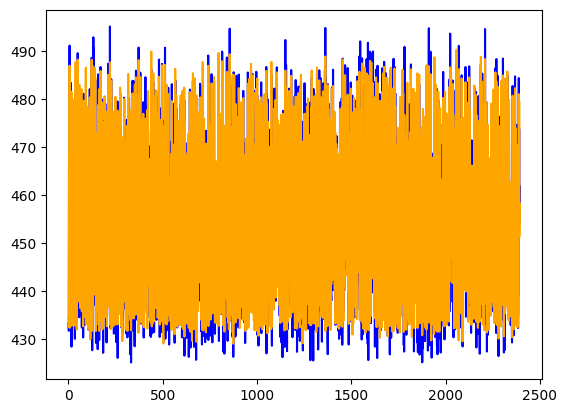

In [36]:
plt.plot(range(1, len(y_test) + 1), scale_y.inverse_transform(y_test_svr), color="blue")
plt.plot(range(1, len(y_test) + 1), y_pred_3, color="orange")

## Polynomial Regression

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
poly = PolynomialFeatures(degree=10)

In [39]:
x_poly = poly.fit_transform(x)

In [40]:
x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(x_poly, y)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
poly_regressor = LinearRegression()

In [43]:
poly_regressor.fit(x_train_poly, y_train_poly)

LinearRegression()

In [44]:
y_pred_4 = poly_regressor.predict(x_test_poly)

In [45]:
scores.update({"Polynomial regression": r2_score(y_true=y_test_poly, y_pred=y_pred_4)})

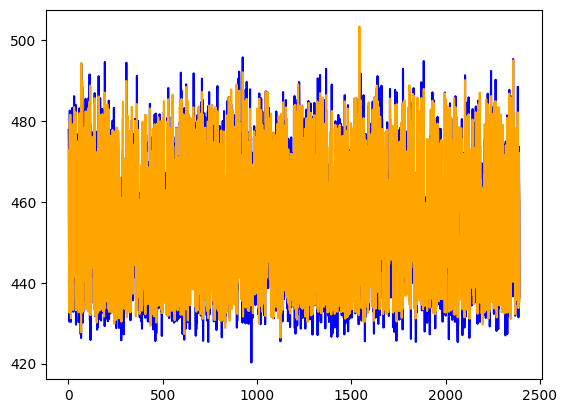

In [46]:
plt.plot(range(1, len(y_test) + 1), y_test_poly, color="blue")
plt.plot(range(1, len(y_test) + 1), y_pred_4, color="orange")

## Multiple Linear Regression

In [47]:
multiple_regression = LinearRegression()

In [48]:
multiple_regression.fit(x_train, y_train)

LinearRegression()

In [49]:
y_pred_5 = multiple_regression.predict(x_test)

In [50]:
scores.update({"multiple regression": r2_score(y_pred=y_pred_5, y_true=y_test)})

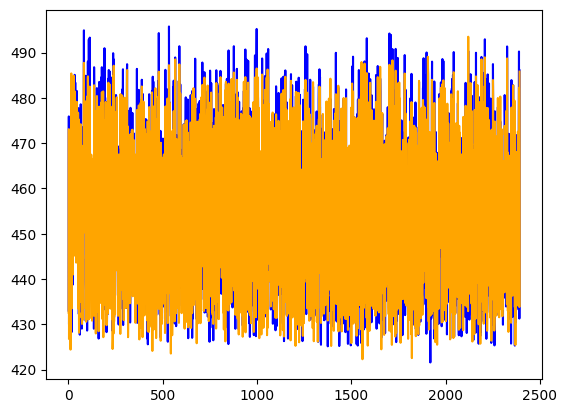

In [51]:
plt.plot(range(1, len(y_test) + 1), y_test, color="blue")
plt.plot(range(1, len(y_test) + 1), y_pred_5, color="orange")

## Verdict

In [52]:
scores

{'decision tree': 0.9342185901308293,
 'random forest': 0.9613483387373869,
 'SVR': 0.9455800852831958,
 'Polynomial regression': 0.9409085936759959,
 'multiple regression': 0.9288079273869924}

In [53]:
max = 0
name = ""
for key in scores:
    if(scores[key] > max):
        max = scores[key]
        name = key
print(f"name : {name}, score : {max}")

name : random forest, score : 0.9613483387373869
